In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mat
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


file_path= '/content/cybersecurity_attacks.csv'

data = pd.read_csv(file_path)

print(data.head())


             Timestamp Source IP Address Destination IP Address  Source Port  \
0  2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   
1  2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245   
2  2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811   
3  2023-07-02 10:38:46     163.42.196.10        101.228.192.255        20018   
4  2023-07-16 13:11:07     71.166.185.76        189.243.174.238         6131   

   Destination Port Protocol  Packet Length Packet Type Traffic Type  \
0             17616     ICMP            503        Data         HTTP   
1             48166     ICMP           1174        Data         HTTP   
2             53600      UDP            306     Control         HTTP   
3             32534      UDP            385        Data         HTTP   
4             26646      TCP           1462        Data          DNS   

                                        Payload Data  ... Action Taken  \
0  Qui natus

In [3]:
print(data.dtypes)

Timestamp                  object
Source IP Address          object
Destination IP Address     object
Source Port                 int64
Destination Port            int64
Protocol                   object
Packet Length               int64
Packet Type                object
Traffic Type               object
Payload Data               object
Malware Indicators         object
Anomaly Scores            float64
Alerts/Warnings            object
Attack Type                object
Attack Signature           object
Action Taken               object
Severity Level             object
User Information           object
Device Information         object
Network Segment            object
Geo-location Data          object
Proxy Information          object
Firewall Logs              object
IDS/IPS Alerts             object
Log Source                 object
dtype: object


In [4]:
data.shape

(40000, 25)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [6]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,40000,39997,2022-06-11 14:28:15,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source IP Address,40000,40000,103.216.15.12,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination IP Address,40000,40000,84.9.164.252,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source Port,40000.0,NaN,NaN,NaN,32970.35645,18560.425604,1027.0,16850.75,32856.0,48928.25,65530.0
Destination Port,40000.0,NaN,NaN,NaN,33150.86865,18574.668842,1024.0,17094.75,33004.5,49287.0,65535.0
Protocol,40000,3,ICMP,13429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Packet Length,40000.0,NaN,NaN,NaN,781.452725,416.044192,64.0,420.0,782.0,1143.0,1500.0
Packet Type,40000,2,Control,20237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Traffic Type,40000,3,DNS,13376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Payload Data,40000,40000,Qui natus odio asperiores nam. Optio nobis ius...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


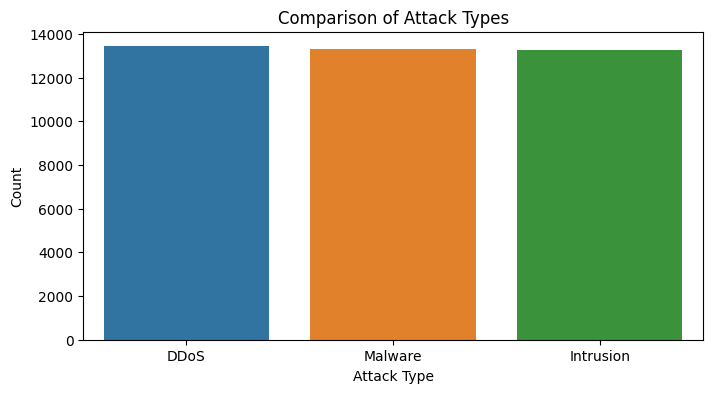

DDoS         13428
Malware      13307
Intrusion    13265
Name: Attack Type, dtype: int64


In [18]:
count = data['Attack Type'].value_counts()

mat.figure(figsize=(8, 4))
sb.barplot(x=count.index , y=count)

mat.xlabel('Attack Type')
mat.ylabel('Count')
mat.title('Comparison of Attack Types')

mat.show()

print(count)

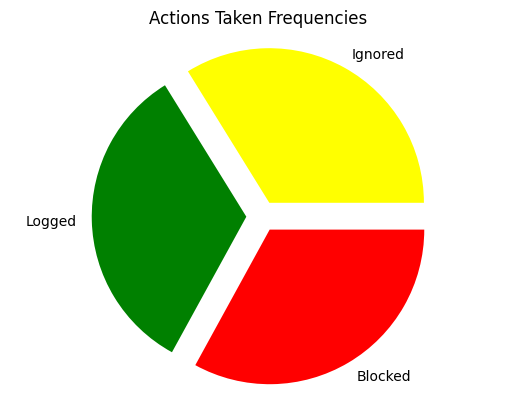

In [26]:
labels =['Ignored','Logged','Blocked']
sizes =data['Action Taken'].value_counts()
colors = ['yellow', 'green', 'red']
explode = (0.1, 0.1, 0.1)

mat.pie(sizes, labels=labels, colors=colors, explode=explode)

mat.axis('equal')
mat.title('Actions Taken Frequencies')

mat.show()

In [28]:
filter_columns = ['Protocol', 'Packet Length', 'Packet Type' , 'Traffic Type' , 'Action Taken', 'Severity Level', 'Firewall Logs', 'Log Source']

data[filter_columns]

,Protocol,Packet Length,Packet Type,Traffic Type,Action Taken,Severity Level,Firewall Logs,Log Source
0,ICMP,503,Data,HTTP,Logged,Low,Log Data,Server
1,ICMP,1174,Data,HTTP,Blocked,Low,Log Data,Firewall
2,UDP,306,Control,HTTP,Ignored,Low,Log Data,Firewall
3,UDP,385,Data,HTTP,Blocked,Medium,NaN,Firewall
4,TCP,1462,Data,DNS,Blocked,Low,NaN,Firewall
...,...,...,...,...,...,...,...,...
39995,UDP,1428,Control,HTTP,Logged,Medium,Log Data,Firewall
39996,UDP,1184,Control,HTTP,Logged,High,Log Data,Firewall
39997,UDP,1043,Data,DNS,Blocked,Low,Log Data,Server
39998,UDP,483,Data,FTP,Ignored,Low,Log Data,Server


In [29]:
label_encoder = LabelEncoder()

data['Protocol_encoded'] = label_encoder.fit_transform(data['Protocol'])
data['Packet Type_encoded'] = label_encoder.fit_transform(data['Packet Type'])
data['Traffic Type_encoded'] = label_encoder.fit_transform(data['Traffic Type'])
data['Severity Level_encoded'] = label_encoder.fit_transform(data['Severity Level'])

X = data[['Protocol_encoded', 'Packet Type_encoded','Traffic Type_encoded']]
Y = data['Severity Level_encoded']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:\n', classification_report(Y_test, Y_pred))

Accuracy: 0.34
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.57      0.42      2598
           1       0.33      0.10      0.15      2673
           2       0.35      0.35      0.35      2729

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.31      8000
weighted avg       0.34      0.34      0.30      8000

